In [90]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [91]:
## Loading the dataset
data=pd.read_csv('dataframe_.csv')
data

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]

In [92]:
## Calling the dataframe and doing basic checks

In [93]:
## Getting the first 5 rows
data.head()

input      output
0 -122.740667 -130.572085
1 -121.531419 -129.938929
2 -134.917019 -130.141832
3 -120.605951 -125.760932
4 -129.894781 -112.785214

In [94]:
## Getting the last 5 rows
data.tail()

input      output
1692  25.410184  -76.380902
1693  29.537304  -82.796934
1694  31.633331  -87.000000
1695  29.091458 -104.943052
1696  17.145296 -101.726894

In [95]:
data.describe()

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

In [96]:
data.dtypes

input     float64
output    float64
dtype: object

In [97]:
## Checking for the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [98]:
## Number of rows and columns
data.shape

(1697, 2)

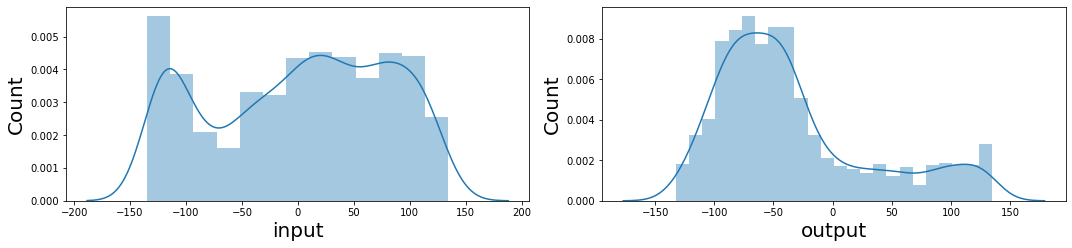

In [99]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Outlier detection and Treatment

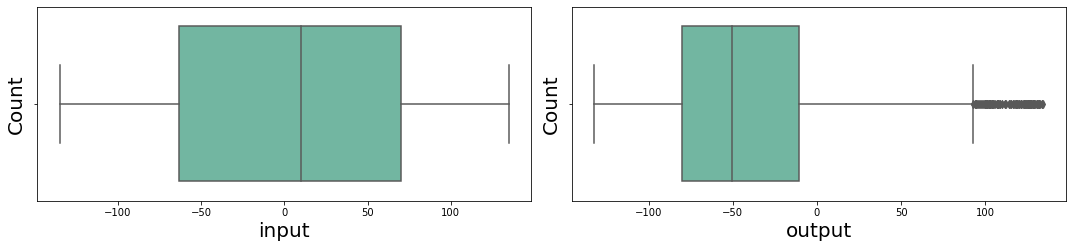

In [100]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column],data=data,palette='Set2')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Insight:  

Presence of outlier is observed in 'OUTPUT'.

#### Using IQR(Inter quartile range) for handling the outliers

In [101]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data.output, interpolation = 'midpoint') 

IQR

nan

In [102]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.output.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.output.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [103]:
min_limit

nan

In [104]:
max_limit

nan

#### Insight:  Presence of outlier is not observed in 'Output'

#### Using 3 standard deviation rule to detect the outliers.

In [105]:
upper_limit = data.output.mean() + 3*data.output.std()
upper_limit

163.22531948143688

In [106]:
lower_limit = data.output.mean() -3*data.output.std()
lower_limit

-231.40135386797573

In [107]:
len((data.loc[data['output'] > upper_limit]))

0

In [108]:
len((data.loc[data['output'] < lower_limit]))

0

In [109]:
data.loc[data['output'] > upper_limit,'output']=data['output'].median()

In [110]:
(data.loc[data['output'] > upper_limit])

Empty DataFrame
Columns: [input, output]
Index: []

In [111]:
data.loc[data['output'] < lower_limit,'output']=data['output'].median()

In [112]:
(data.loc[data['output'] < lower_limit])

Empty DataFrame
Columns: [input, output]
Index: []

<AxesSubplot:xlabel='output'>

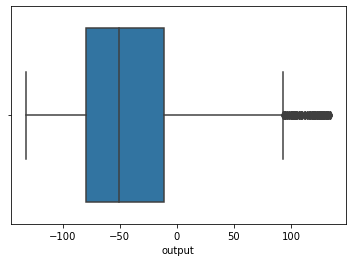

In [113]:
sns.boxplot(x=data.output,data=data)

#### Scaling the data

In [214]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [215]:
type(scaled_data)

numpy.ndarray

### Feature Engineering

In [216]:
data.isnull

<bound method DataFrame.isnull of            input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]>

In [217]:
data.isnull().sum()

input     0
output    0
dtype: int64

In [218]:
data['input'] = data['input'].fillna(data['input'].median())

In [219]:
data['output'] = data['output'].fillna(data['output'].median())

In [220]:
data.isnull().sum()

input     0
output    0
dtype: int64

<AxesSubplot:>

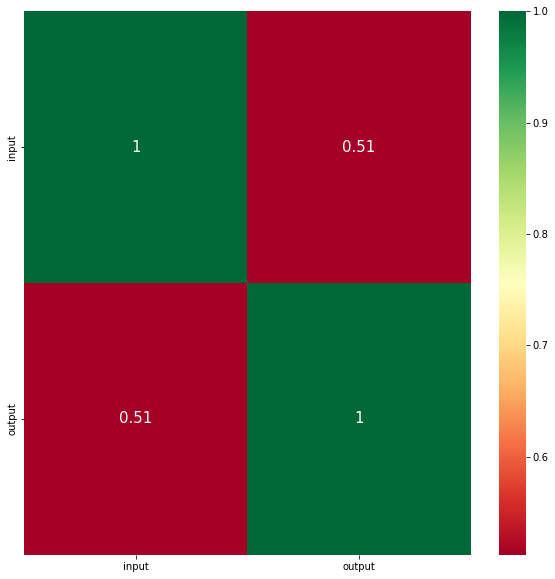

In [221]:
## Checking correlation

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True,cmap="RdYlGn", annot_kws={"size":15})

### Model Creation

In [222]:
## Creating independent and dependent variable
X = data.input
Y = data.output

In [223]:
X = np.array(X).reshape(-1,1)

In [224]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [225]:
X_train

array([[  -5.18512452],
       [-115.5637388 ],
       [  84.6333313 ],
       ...,
       [-120.8121797 ],
       [ 105.0756003 ],
       [-133.8181748 ]])

In [226]:
Y_train

208     -70.202439
1117   -126.267621
1417      7.000000
1524     29.150656
58      -55.000000
           ...    
1130    -85.090711
1294    -52.843621
860    -132.422167
1459     90.884730
1126   -127.063611
Name: output, Length: 1272, dtype: float64

In [227]:
X_test

array([[ 2.98812668e+01],
       [-5.08998696e+01],
       [-3.40046026e+01],
       [ 1.17633331e+02],
       [ 8.15812922e+01],
       [ 1.10135197e+02],
       [-7.58673491e+00],
       [ 1.14933691e+01],
       [ 1.26257790e+02],
       [-6.86556756e+01],
       [ 1.66333313e+01],
       [ 1.24727894e+02],
       [ 9.48247800e+01],
       [ 2.96714939e+01],
       [-9.32466879e+01],
       [-5.18512452e+00],
       [-1.33130296e+02],
       [-7.83666687e+01],
       [ 9.05767223e+01],
       [ 1.09085309e+02],
       [-2.76921886e+01],
       [-1.22366669e+02],
       [-2.39954204e+01],
       [-8.93666687e+01],
       [ 7.76333313e+01],
       [ 2.98796474e+01],
       [-1.27366669e+02],
       [-2.93916879e+01],
       [ 8.86333313e+01],
       [ 6.71474931e+01],
       [-1.13313112e+02],
       [ 6.36225441e+01],
       [-2.43666687e+01],
       [-1.13278338e+02],
       [ 6.06333313e+01],
       [ 6.22527991e+01],
       [ 6.46442617e+01],
       [-2.98077384e+01],
       [ 1.0

In [228]:
Y_test

618     -81.760711
115     -51.665133
135     -57.318721
350     107.000000
1395    -25.074661
           ...    
1617   -111.079269
1635   -114.403385
425      22.862710
1175    -72.978307
1259    -46.170716
Name: output, Length: 425, dtype: float64

#### Linear Regression

In [229]:
#### Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()  # object creation\
LR.fit(X_train,Y_train)  # Training of the algorithm  #fit takes 2 parameter always
y_predict=LR.predict(X_test)

In [230]:
y_predict

array([-2.11344203e+01, -5.70925177e+01, -4.95719296e+01,  1.79266454e+01,
        1.87880567e+00,  1.45890019e+01, -3.78125473e+01, -2.93194230e+01,
        2.17656497e+01, -6.49961575e+01, -2.70314722e+01,  2.10846472e+01,
        7.77387776e+00, -2.12277965e+01, -7.59423518e+01, -3.67435188e+01,
       -9.36957372e+01, -6.93188106e+01,  5.88294037e+00,  1.41216653e+01,
       -4.67620855e+01, -8.89045252e+01, -4.51165435e+01, -7.42152393e+01,
        1.21450308e-01, -2.11351412e+01, -9.11301746e+01, -4.75185834e+01,
        5.01787896e+00, -4.54610955e+00, -8.48745165e+01, -6.11516969e+00,
       -4.52817972e+01, -8.48590378e+01, -7.44575761e+00, -6.72488412e+00,
       -5.66037268e+00, -4.77037799e+01,  1.04700639e+01, -1.02048818e+01,
       -1.81300932e+01, -8.97947850e+01, -8.21015423e+00, -8.93496551e+01,
       -3.50440623e+01, -2.06695350e+01, -8.09872027e+00, -8.93519611e+01,
       -3.01502623e+01, -7.64152799e+01, -7.77762783e+01, -2.33307213e+01,
       -9.26539701e+01,  

In [231]:
#### model evaluation
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score=r2_score(Y_test,y_predict)

In [232]:
r2score

0.16485763951381205

In [233]:
X_test.shape

(425, 1)

In [239]:
## Calculate adjusted r2 score
adjusted_r2=1-(1-0.16)*(425-1)/(425-1-0.16)
adjusted_r2

0.1596828992072481

In [240]:
import math
print(mean_squared_error(Y_test,y_predict))
print(math.sqrt(mean_squared_error(Y_test,y_predict)))  #root mean squared error

3778.997308767783
61.47354966786759


In [241]:
print(mean_absolute_error(Y_test,y_predict))

45.82743229060816


#### Random Forest Regressor

In [242]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [243]:
y_predictRF=rf_reg.predict(X_test)

In [244]:
y_predictRF

array([ -89.58832282,  -49.88949057,  -54.44636751,   95.98348319,
        -24.86813839,   82.53410517,  -68.22311158, -101.88609926,
         93.66528479,  -39.77456717,  -97.48874092,  123.64848518,
         30.30282454,  -76.44187897,  -44.34016421,  -68.46811131,
        -93.2016396 ,  -33.78183782,   24.40565389,   83.85484696,
        -69.18385853,  -86.16015222,  -68.85471343,  -44.54865526,
          6.98476364,  -89.58832282,  -95.77564918,  -60.44049905,
         20.39353133,  -38.33197568,  -91.19562096,  -40.80453069,
        -65.7715857 ,  -86.6420646 ,  -67.2032087 ,  -36.35029412,
        -19.48276883,  -47.80047778,   45.44921273,  -60.78342965,
        -55.42252988,  -21.50411314,  -15.66432047,  -98.01304356,
        -86.99611925,  -78.47250618,  -53.60410988,  -98.01304356,
        -92.90752922,  -40.81983294,  -52.8606206 ,  -63.87067147,
        -47.9111835 ,   98.14719179,   67.90218579, -105.53426626,
        -44.58347595,  -80.63301044,  -67.20693   ,  -67.38714

#### Model evaluation for Random Forest Regression

In [245]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_RF=r2_score(Y_test,y_predictRF)

In [246]:
r2score_RF

0.6849628473787862

In [247]:
X_test.shape

(425, 1)

In [248]:
## Calculate adjusted r2 score
adjusted_r2_RF=1-(1-0.68)*(425-1)/(425-1-0.68)
adjusted_r2_RF

0.6794859680619862

In [249]:
import math
print(mean_squared_error(Y_test,y_predictRF))
print(math.sqrt(mean_squared_error(Y_test,y_predictRF)))  #root mean squared error

1425.5348647676717
37.75625596861627


In [250]:
print(mean_absolute_error(Y_test,y_predictRF))

19.090267212978883


#### Hyperparameter tuning for Random Forest Regression

In [251]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_reg1 = RandomForestRegressor(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_reg1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, Y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None})


In [252]:
rf_reg2 = RandomForestRegressor(**rf_best_params)
rf_reg2.fit(X_train, Y_train)
y_predict_rf=rf_reg2.predict(X_test)
y_predict_rf

array([ -88.92231177,  -50.10980111,  -54.40184244,   98.00521792,
        -22.84199829,   82.76629656,  -67.84125373, -101.70767658,
         92.16377719,  -40.745707  ,  -97.37978009,  123.57455457,
         29.52353905,  -77.215208  ,  -44.09884797,  -68.70279659,
        -91.52961585,  -32.48347062,   25.43184846,   84.54916018,
        -69.47715773,  -78.90422659,  -69.85325775,  -45.61808324,
          6.67229298,  -88.92231177,  -98.0640141 ,  -62.58208229,
         20.63513639,  -37.29486976,  -92.03926257,  -39.50793564,
        -65.60767246,  -86.55813406,  -67.05501539,  -36.44915795,
        -20.64955238,  -48.60442955,   45.6415694 ,  -58.53310874,
        -50.24300734,  -20.51512864,  -17.50023535,  -96.5130387 ,
        -86.42022669,  -78.98573844,  -54.52156351,  -96.5130387 ,
        -93.29754236,  -40.68270944,  -53.17599825,  -63.98334847,
        -42.32659479,   99.0577673 ,   62.40722223, -104.92475553,
        -44.86543047,  -80.88697384,  -66.44854215,  -67.11299

#### Model evaluation afteer Hyperparameter tuning

In [253]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_rf=r2_score(Y_test,y_predict_rf)
r2score_rf

0.6831411121260738

In [254]:
## Calculate adjusted r2 score
adjusted_r2_rf=1-(1-0.68)*(425-1)/(425-1-0.68)
adjusted_r2_rf

0.6794859680619862

In [255]:
import math
print(mean_squared_error(Y_test,y_predict_rf))
print(math.sqrt(mean_squared_error(Y_test,y_predict_rf)))  #root mean squared error

1433.7781690748322
37.865263356734125


In [256]:
print(mean_absolute_error(Y_test,y_predict_rf))

19.06595828353609


#### KNN Model

In [257]:
from sklearn.neighbors import KNeighborsRegressor#USING KNN
KNN1=KNeighborsRegressor() ## model object creation
KNN1.fit(X_train,Y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [258]:
y_hat_knn

array([-8.65378193e+01, -4.89958999e+01, -4.89372241e+01,  9.01162503e+01,
       -1.04009139e+01,  8.69699770e+01, -8.18605600e+01, -9.09343713e+01,
        9.81491355e+01, -3.62079763e+01, -1.00980990e+02,  9.57646986e+01,
        3.50953788e+01, -8.79806643e+01, -4.64100776e+01, -7.63452948e+01,
       -1.10544035e+02, -3.67368749e+01,  3.08434760e+01,  9.58808836e+01,
       -6.62025386e+01, -5.54677821e+01, -6.65269615e+01, -4.36953225e+01,
        3.87458484e-01, -8.65378193e+01, -5.83372721e+01, -5.55901502e+01,
        3.21229877e+00, -1.26917677e+01, -8.20159019e+01, -3.55282028e+01,
       -6.53269615e+01, -8.20159019e+01, -3.83699603e+01, -3.75667670e+01,
       -2.92370256e+01, -5.18066490e+01,  4.64532811e+01, -4.67462474e+01,
       -5.64192959e+01, -5.57610752e-01, -3.41431664e+01, -9.17193875e+01,
       -9.27240304e+01, -7.94654337e+01, -4.27295534e+01, -9.17193875e+01,
       -9.55466650e+01, -4.24438406e+01, -5.36531740e+01, -7.51746226e+01,
       -5.83191932e+01,  

#### Model evaluation for KNN

In [259]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_KNN=r2_score(Y_test,y_hat_knn)
r2score_KNN

0.6378867971766229

In [260]:
X_test.shape

(425, 1)

In [261]:
## Calculate adjusted r2 score
adjusted_r2_KNN=1-(1-0.63)*(425-1)/(425-1-0.63)
adjusted_r2_KNN

0.6294494177669651

In [262]:
import math
print(mean_squared_error(Y_test,y_predictRF))
print(math.sqrt(mean_squared_error(Y_test,y_hat_knn)))  #root mean squared error

1425.5348647676717
40.479040984288076


In [263]:
print(mean_absolute_error(Y_test,y_hat_knn))

22.36712643655247


#### Decision Tree

In [264]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
y_hat_DT=dt.predict(X_test)

In [265]:
y_hat_DT

array([ -95.87848863,  -51.66513308,  -57.31872135,  107.        ,
        -25.0746607 ,   80.3365181 ,  -64.97087781, -112.8431645 ,
         82.36724538,  -42.54812756,  -97.        ,  129.        ,
          1.21625178,  -73.48791167,  -44.03772921,  -70.20243924,
        -72.42753461,  -35.        ,   18.03833636,   83.93005242,
        -65.22934947,  -87.        ,  -73.51940597,  -44.        ,
         -1.        ,  -95.87848863, -101.        ,  -72.45230268,
         26.        ,  -57.60861351,  -92.94112847,  -36.        ,
        -63.        ,  -99.43907611,  -89.16489504,  -34.40501243,
         -5.49482492,  -48.29808186,   41.36624334,  -59.        ,
        -39.63667139,  -24.        ,    5.15080161,  -95.        ,
        -76.        ,  -75.9911003 ,  -76.93193485,  -95.        ,
        -92.13509303,  -39.63824551,  -49.        ,  -60.14806655,
        -83.82733147,  103.        ,   43.61714619, -109.0310113 ,
        -43.12700344,  -80.74906409,  -73.19863132,  -76.65343

#### Evaluation of model

In [266]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_DT=r2_score(Y_test,y_hat_DT)
r2score_DT

0.6549954233451032

In [267]:
X_test.shape

(425, 1)

In [268]:
## Calculate adjusted r2 score
adjusted_r2_DT=1-(1-0.65)*(425-1)/(425-1-0.65)
adjusted_r2_DT

0.6494626195819063

In [269]:
import math
print(mean_squared_error(Y_test,y_hat_DT))
print(math.sqrt(mean_squared_error(Y_test,y_hat_DT)))  #root mean squared error

1561.1366736713217
39.51122212323129


In [270]:
print(mean_absolute_error(Y_test,y_hat_DT))

15.767925368214902


#### Hyper-parameter Tuning of Decision Tree Regressor

In [271]:
from sklearn.model_selection import GridSearchCV

In [272]:
params = { 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_reg = DecisionTreeRegressor(random_state=3)
tree_cv = GridSearchCV(tree_reg, params, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3, cv=3)
tree_cv.fit(X_train,Y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
Best paramters: {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'})


In [273]:
print(f"Best paramters: {best_params})")

Best paramters: {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'})


In [274]:
tree_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 18,
 'min_samples_split': 2,
 'splitter': 'best'}

In [275]:
tree_cv.best_score_

-1201.6151492557701

In [276]:
dt1=DecisionTreeRegressor(max_depth= 8,min_samples_leaf=18,min_samples_split= 2,splitter= 'best')
dt1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=18)

In [277]:
y_hat_dt=dt1.predict(X_test)
y_hat_dt

array([ -85.18510788,  -44.30277482,  -44.30277482,   96.40844261,
         -7.0436637 ,   74.97569696,  -78.93632365,  -95.85874977,
        108.9234569 ,  -44.30277482,  -95.85874977,  108.9234569 ,
         30.53857173,  -85.18510788,  -44.30277482,  -78.93632365,
        -92.12634822,  -44.30277482,   44.75766329,   74.97569696,
        -61.30044597,  -56.31511823,  -61.30044597,  -44.30277482,
          2.28146324,  -85.18510788, -110.45194925,  -54.35567545,
         15.19841709,  -31.02262142,  -69.16776103,  -37.62301156,
        -61.30044597,  -69.16776103,  -37.62301156,  -37.62301156,
        -20.17645322,  -54.35567545,   62.30998326,  -47.03292149,
        -63.47601418,   18.84370897,  -37.62301156,   18.84370897,
        -85.12941183,  -85.18510788,  -37.62301156,   18.84370897,
        -95.85874977,  -44.30277482,  -44.30277482,  -76.6619564 ,
        -92.12634822,   89.23231362,   89.23231362,  -95.85874977,
        -47.03292149,  -88.4938467 ,  -60.0602262 ,  -88.20656

#### Model evaluation after Hyperparameter tuning

In [278]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_dt=r2_score(Y_test,y_hat_dt)
r2score_dt

0.6647954233894966

In [279]:
X_test.shape

(425, 1)

In [280]:
## Calculate adjusted r2 score
adjusted_r2_dt=1-(1-0.66)*(425-1)/(425-1-0.66)
adjusted_r2_dt

0.6594699296074078

In [281]:
import math
print(mean_squared_error(Y_test,y_hat_dt))
print(math.sqrt(mean_squared_error(Y_test,y_hat_dt)))  #root mean squared error

1516.791930133074
38.946013019731225


In [282]:
print(mean_absolute_error(Y_test,y_hat_dt))

22.546625742870255


#### Support Vector Regressor

In [283]:
from sklearn.svm import SVR
svregressor = SVR() ## base model with default parameters
svregressor.fit(X, Y)

SVR()

In [284]:
y_hat_SVR=svregressor.predict(X_test)

In [285]:
y_hat_SVR

array([-80.9530172 , -40.4155272 , -51.93476254,  65.79768829,
         9.11229042,  58.40429535, -76.62883848, -86.5382025 ,
        70.80021408, -37.90944118, -86.68090292,  70.1881607 ,
        35.36294554, -81.11443383, -50.34115329, -78.52205801,
       -78.50315213, -40.98449747,  27.42002301,  57.150274  ,
       -57.75122179, -72.86629567, -61.33383086, -47.4962278 ,
         0.66704399, -80.95427206, -75.79895421, -56.1379485 ,
        23.6149616 , -21.9848675 , -66.45217442, -29.41735798,
       -60.97102028, -66.4254164 , -35.55515889, -32.25164532,
       -27.28189048, -55.7474708 ,  45.63040758, -47.60760378,
       -74.55800301, -74.09969307, -38.9947339 , -73.49260598,
       -81.2154885 , -80.11551861, -38.49767035, -73.49580108,
       -86.18339904, -51.15483605, -53.56017385, -84.14422352,
       -77.49830512,  63.17398217,  61.20326106, -86.7713555 ,
       -46.23085193, -84.252253  , -60.45625006, -72.02028677,
       -47.71233163, -52.70016409, -52.68102101,  17.41

#### Evaluation of model

In [286]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_SVR=r2_score(Y_test,y_hat_SVR)
r2score_SVR

0.6012480920008079

In [287]:
X_test.shape

(425, 1)

In [288]:
## Calculate adjusted r2 score
adjusted_r2_SVR=1-(1-0.60)*(425-1)/(425-1-0.60)
adjusted_r2_SVR

0.5994331601322626

In [289]:
import math
print(mean_squared_error(Y_test,y_hat_SVR))
print(math.sqrt(mean_squared_error(Y_test,y_hat_SVR)))  #root mean squared error

1804.3419403581877
42.47754630811657


In [290]:
print(mean_absolute_error(Y_test,y_hat_SVR))

23.136331783089084


#### Hyperparameter tuning of SVR

In [291]:
from sklearn.svm import SVR

In [292]:
regressor=SVR(C=0.1,cache_size=200,coef0=1,degree=3,epsilon=0.1,gamma='auto',kernel='rbf')

In [293]:
regressor.fit(X,Y)

SVR(C=0.1, coef0=1, gamma='auto')

In [294]:
y_reg1=regressor.predict(X_test)
y_reg1

array([-51.82708669, -49.50603593, -50.73543577, -49.49496865,
       -49.72828387, -49.83365647, -51.89650477, -52.26756654,
       -49.93123446, -49.96222582, -52.16281524, -49.8095475 ,
       -49.46118894, -51.72102142, -49.84088205, -52.04540492,
       -51.74445222, -50.27693527, -49.46247347, -49.64386966,
       -51.79990471, -51.49541254, -51.23261666, -50.61620363,
       -49.19365682, -51.82636857, -50.99720038, -50.64951413,
       -49.74394608, -49.9214738 , -52.51241837, -49.74542455,
       -51.18509353, -52.50508538, -50.26112075, -50.26344067,
       -49.83115031, -50.44876682, -49.40231399, -50.05057568,
       -51.3076537 , -50.97753791, -49.98754711, -51.2700473 ,
       -51.96586576, -51.92335185, -50.08062053, -51.26832232,
       -51.97531543, -50.05607352, -50.57486416, -52.10236069,
       -52.42832798, -49.23459174, -47.78442916, -52.1534553 ,
       -49.99145607, -52.41587816, -51.02629181, -51.9291847 ,
       -50.0692406 , -50.16011112, -50.16431547, -49.07

#### Model evaluation after hyperparameter tuning

In [295]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_svr=r2_score(Y_test,y_reg1)
r2score_svr

-0.045035302747351125

In [296]:
X_test.shape

(425, 1)

In [297]:
## Calculate adjusted r2 score
adjusted_r2_svr=1-(1+0.04)*(425-1)/(425-1+0.04)
adjusted_r2_svr

-0.039901896047542795

In [298]:
import math
print(mean_squared_error(Y_test,y_reg1))
print(math.sqrt(mean_squared_error(Y_test,y_reg1)))  #root mean squared error

4728.757375389869
68.76596087738372


In [299]:
print(mean_absolute_error(Y_test,y_reg1))

48.24902081061221


### Conclusion:

In [300]:
r2_score=[r2score,r2score_RF,r2score_KNN,r2score_DT,r2score_SVR]
col={'R2 Score':r2_score}
models=['Linear Regression','Random Forest Regressor','KNN Regressor','Decision Tree Regressor','Support Vector Regressor']
df=pd.DataFrame(data=col,index= models)
df

R2 Score
Linear Regression         0.164858
Random Forest Regressor   0.684963
KNN Regressor             0.637887
Decision Tree Regressor   0.654995
Support Vector Regressor  0.601248

### Conclusion: Of all the algorithms worked upon, Random Forest Regressor is the one with minimum Root Mean Squared Error and  Mean Absolute Error of 37.68 and 19.00 respectively.

### Hence, it is concluded that Random Forest Regressor is working better than the other algorithm models.